In [4]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


NUM_CLASSES = 10

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

170500096/170498071 [==============================] - 4s 0us/step


In [23]:
from keras.layers import Input, Conv2D, BatchNormalization, Flatten, Dense, Dropout, Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model

input_layer = Input((32, 32, 3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [26]:
from keras.optimizers import Adam

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_38 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_39 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_38 (LeakyReLU)   (None, 16, 16, 32)        0   

In [21]:
from keras.models import Sequential

model_2 = Sequential()

model_2.add(Conv2D(filters=32, kernel_size = 3, strides = 1, padding = 'same', input_shape=(32,32,3)))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU())

model_2.add(Conv2D(filters=32, kernel_size = 3, strides = 2, padding = 'same'))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU())

model_2.add(Conv2D(filters=64, kernel_size = 3, strides = 1, padding = 'same'))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU())

model_2.add(Conv2D(filters=64, kernel_size = 3, strides = 2, padding = 'same'))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU())

model_2.add(Flatten())

model_2.add(Dense(128))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU())
model_2.add(Dropout(rate = 0.5))

model_2.add(Dense(NUM_CLASSES, activation='softmax'))

In [22]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_33 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_34 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 64)       

In [28]:
model.fit(x_train, y_train, batch_size = 32, epochs = 100, shuffle = True)

Epoch 1/100
50000/50000 [==============================] - 17s 331us/step - loss: 1.5356 - accuracy: 0.4611
Epoch 2/100
50000/50000 [==============================] - 16s 315us/step - loss: 1.1377 - accuracy: 0.5972
Epoch 3/100
50000/50000 [==============================] - 16s 315us/step - loss: 1.0044 - accuracy: 0.6498
Epoch 4/100
50000/50000 [==============================] - 16s 316us/step - loss: 0.9233 - accuracy: 0.6782
Epoch 5/100
50000/50000 [==============================] - 16s 313us/step - loss: 0.8571 - accuracy: 0.7000
Epoch 6/100
50000/50000 [==============================] - 16s 317us/step - loss: 0.8075 - accuracy: 0.7171
Epoch 7/100
50000/50000 [==============================] - 16s 321us/step - loss: 0.7640 - accuracy: 0.7344
Epoch 8/100
50000/50000 [==============================] - 16s 314us/step - loss: 0.7214 - accuracy: 0.7462
Epoch 9/100
50000/50000 [==============================] - 16s 315us/step - loss: 0.6871 - accuracy: 0.7601
Epoch 10/100
50000/50000 [==

In [30]:
model.evaluate(x_test, y_test, batch_size=100)

10000/10000 [==============================] - 1s 61us/step


[1.5310517644882202, 0.7218000292778015]

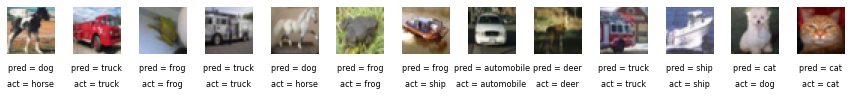

In [40]:
import matplotlib.pyplot as plt

CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis= -1)]

n_to_show = 13

idx = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, x in enumerate(idx):
  img = x_test[x]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[x]), fontsize=8, ha = 'center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[x]), fontsize=8, ha = 'center', transform=ax.transAxes)
  ax.imshow(img)